# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading

First we need to import the required Python packages for basic image manipulation.

Run the following code:

In [10]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the
notebook**):

In [28]:
%matplotlib inline

==============================================================================================

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 100 rows and 100 columns where each value should be of type unsigned integer with 8 bits.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint8


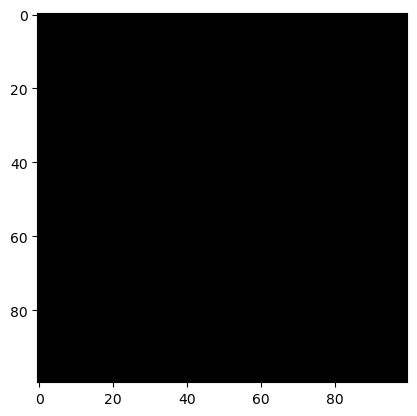

In [28]:
#Your solution
image=np.zeros((100,100),dtype=np.uint8)
print(image)
print(image.dtype)

plt.imshow(image, cmap='gray')




How many different values can each pixel have in this case?

In [ ]:
#Your solution
# Puedo tener 256 valores, de 0 a 255


b) Create and display a **RGB image** that has 100 rows and 100 columns where each value should be of type unsigned integer with 8 bits. Then, transform it to grayscale.:

uint8
float64
uint8


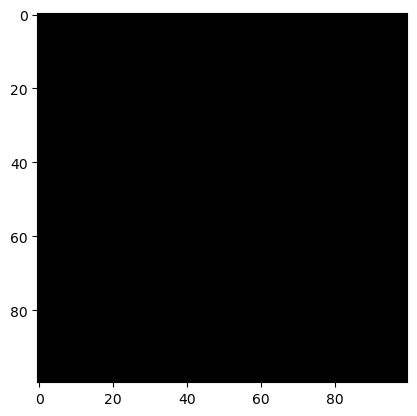

In [29]:
#Your solution
from skimage.color import rgb2gray


imageRGB = np.zeros((100,100,3), dtype=np.uint8)
plt.imshow(imageRGB)
print(imageRGB.dtype)

imamgeRGB_gray = rgb2gray(imageRGB)
print(imamgeRGB_gray.dtype)

imageRGB_gray_uint8 = (imamgeRGB_gray * 255).astype(np.uint8)
print(imageRGB_gray_uint8.dtype)




c) Change the color of the pixels of the image in section **a)** in such a way that you produce the following image. You must use a plot with three subplots.

![./images_notebook/gray_grid.png](./images_notebook/gray_grid.png)

Visualize the image and print the values of its first row.

uint8


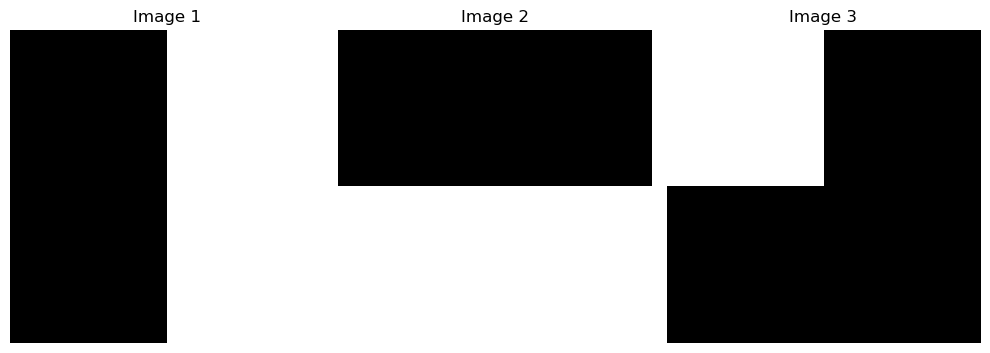

In [30]:
#Your solution

image=np.zeros((100,100),dtype=np.uint8)
image1=image.copy()
image2=image.copy()
image3=image.copy()

print(image1.dtype)

image1[:,50:100]=255

image2[50:100,:]=255
image=np.zeros((100,100),dtype=np.uint8)

image3[0:50,0:50]=255

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image1, cmap='gray')
axs[0].set_title("Image 1")
axs[0].axis('off')

axs[1].imshow(image2, cmap='gray')
axs[1].set_title("Image 2")
axs[1].axis('off')

axs[2].imshow(image3, cmap='gray')
axs[2].set_title("Image 3")
axs[2].axis('off')

plt.tight_layout()
plt.show()

d) Flip the third image to create a mirror ilusion. Show the resulting image while preseving the axis.

![./images_notebook/mirror.png](./images_notebook/mirror.png)

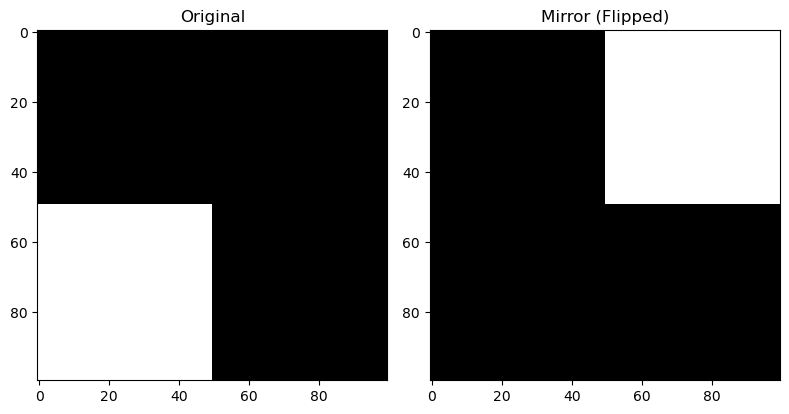

In [31]:
#Your solution
image3_flipped = np.flip(image3, axis=1)
image3_flipped_v = np.flip(image3, axis=0)

# Mostrar imagen original y reflejada
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image3_flipped_v, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('on')   # preservamos los ejes

axs[1].imshow(image3_flipped, cmap='gray')
axs[1].set_title("Mirror (Flipped)")
axs[1].axis('on')   # preservamos los ejes

plt.tight_layout()
plt.show()

e) Use the above three images (from 1.c) to create the following image

![./images_notebook/color_grid.png](./images_notebook/color_grid.png)

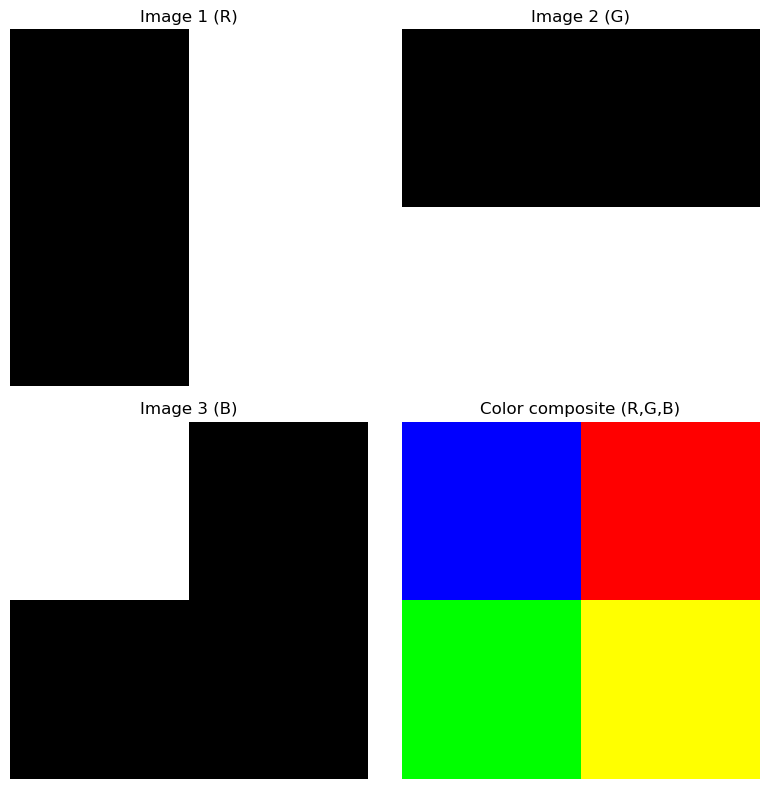

First row of Image1 (R channel): [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]


In [ ]:
#Your solution
# Create an RGB image by stacking the three grayscale images from 1.c as R,G,B channels

# If image1/image2/image3 were created in the previous cell, use them
color_img = np.stack((image1, image2, image3), axis=2)


# Display the three grayscale images and the color composite
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(image1, cmap='gray')
axs[0,0].set_title('Image 1 (R)')
axs[0,0].axis('off')
axs[0,1].imshow(image2, cmap='gray')
axs[0,1].set_title('Image 2 (G)')
axs[0,1].axis('off')
axs[1,0].imshow(image3, cmap='gray')
axs[1,0].set_title('Image 3 (B)')
axs[1,0].axis('off')
# Show the color composite (uint8 RGB) -- matplotlib expects RGB order

axs[1,1].imshow(color_img)
axs[1,1].set_title('Color composite (R,G,B)')
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

# Print the first row of the first grayscale image as verification
print('First row of Image1 (R channel):', image1[0])

### 1.2 Image saving and loading

a) Use the IO image package to save the previously generated image:

In [33]:
#Your solution
# Save the color composite produced in 1.e (if present) to disk using skimage.io.imsave

io.imsave('images_notebook/color_grid.png', color_img)
print('Saved color_grid.png')


Saved color_grid.png


b) Load the saved image and visualize it. Print the dimensions, the value of pixel (10,10) and data type in order to check everything is correct

shape: (100, 100, 3)
pixel (10,10): [  0   0 255]
dtype: uint8


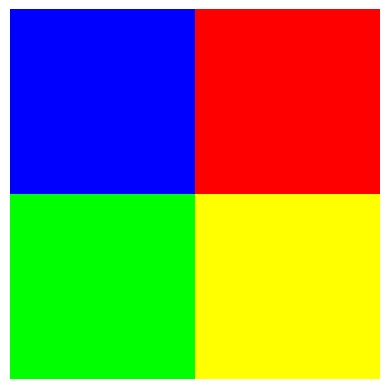

In [ ]:
#Your solution
# Load the saved image and visualize it. Print dimensions, pixel (10,10) and dtype
from skimage import io
img_loaded = io.imread('images_notebook/color_grid.png')
print('shape:', img_loaded.shape)
# If image has channels, print pixel at (10,10)
print('pixel (10,10):', img_loaded[10,10])

print('dtype:', img_loaded.dtype)
plt.imshow(img_loaded)
plt.axis('off')
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/panda.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?!

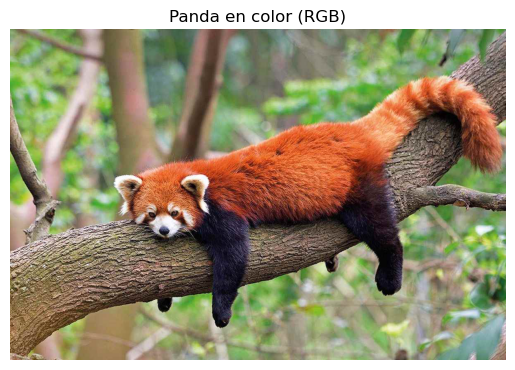

Dimensiones de la imagen: (800, 1200, 3)
Tipo de dato: uint8


In [14]:
from skimage import io
import matplotlib.pyplot as plt

# Cargar la imagen
panda = io.imread("images_notebook/panda.jpg")

# Mostrar la imagen en su formato original (RGB)
plt.imshow(panda)
plt.title("Panda en color (RGB)")
plt.axis("off")
plt.show()

# Revisar dimensiones y tipo de datos
print("Dimensiones de la imagen:", panda.shape)
print("Tipo de dato:", panda.dtype)


b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

Saved panda_gray.png


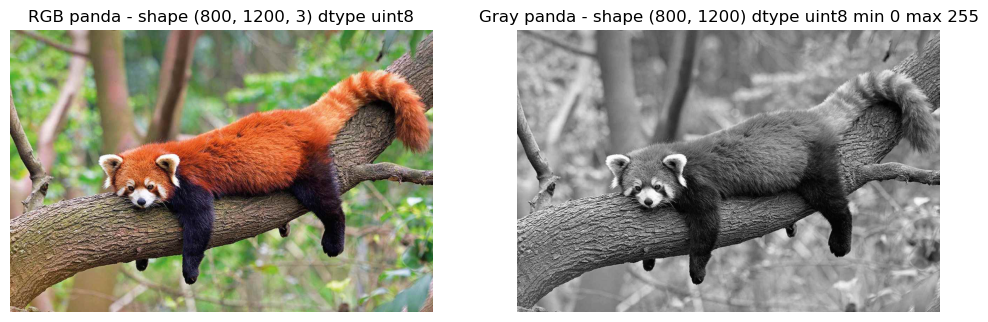

In [15]:
#Your solution
# Convert panda to grayscale and save it
from skimage.color import rgb2gray
from skimage import img_as_ubyte


panda_gray_f = rgb2gray(panda)  # float in [0,1]
panda_gray = img_as_ubyte(panda_gray_f)  # uint8 0-255
io.imsave('images_notebook/panda_gray.png', panda_gray)
print('Saved panda_gray.png')
# plot both
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(panda)
axs[0].set_title(f'RGB panda - shape {panda.shape} dtype {panda.dtype}')
axs[0].axis('off')
axs[1].imshow(panda_gray, cmap='gray')
axs[1].set_title(f'Gray panda - shape {panda_gray.shape} dtype {panda_gray.dtype} min {panda_gray.min()} max {panda_gray.max()}')
axs[1].axis('off')
plt.show()


c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

mean value: 128.10933229166668


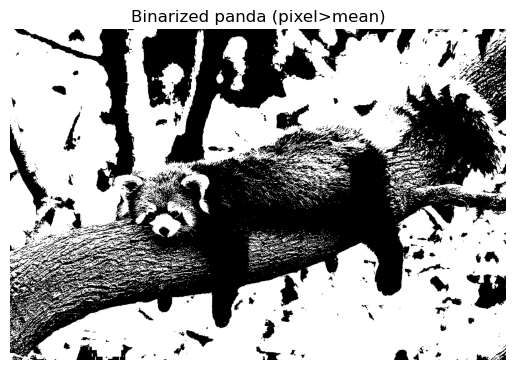

In [16]:
#Your solution
# Compute mean of grayscale panda and binarize
from skimage import img_as_float


mean_val = panda_gray.mean()
print('mean value:', mean_val)
# Create boolean image: pixels > mean -> white
binary = panda_gray > mean_val
plt.imshow(binary, cmap='gray')
plt.title('Binarized panda (pixel>mean)')
plt.axis('off')
plt.show()

d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images and their descriptions

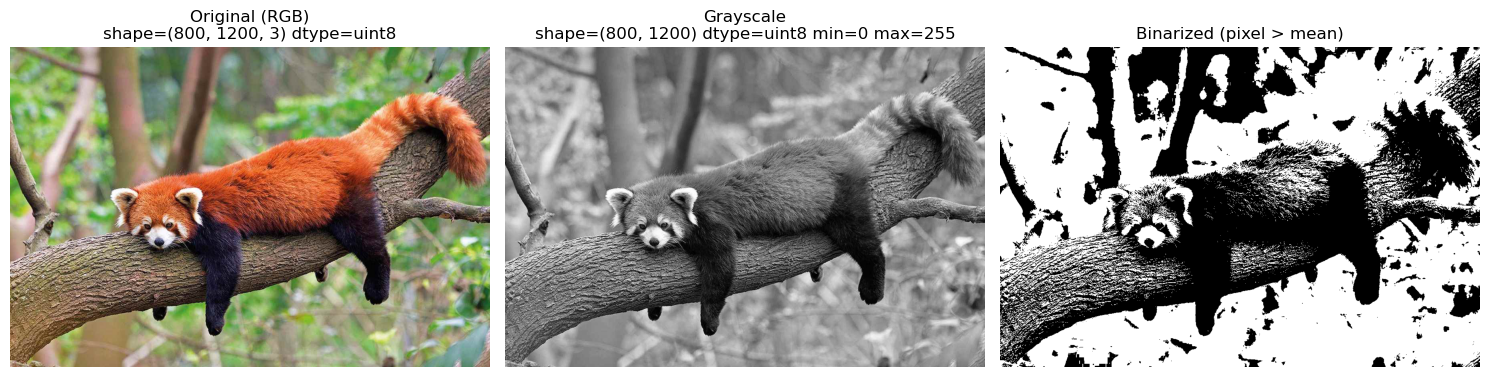

In [17]:
#Your solution
# Ensure panda, panda_gray and binary exist; if not, load or compute them
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_ubyte


# Display the three images side-by-side with titles and stats
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(panda)
axs[0].set_title(f"Original (RGB)\nshape={panda.shape} dtype={panda.dtype}")
axs[0].axis('off')

axs[1].imshow(panda_gray, cmap='gray')
axs[1].set_title(f"Grayscale\nshape={panda_gray.shape} dtype={panda_gray.dtype} min={panda_gray.min()} max={panda_gray.max()}")
axs[1].axis('off')

axs[2].imshow(binary, cmap='gray')
axs[2].set_title('Binarized (pixel > mean)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### 1.4 Images manipulation

a) Create an RGB black image, 15% larger than the panda image. Afterwards, embed the dog image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 15% larger then the first one.


Original shape: (800, 1200, 3)
Framed shape: (920, 1380, 3)


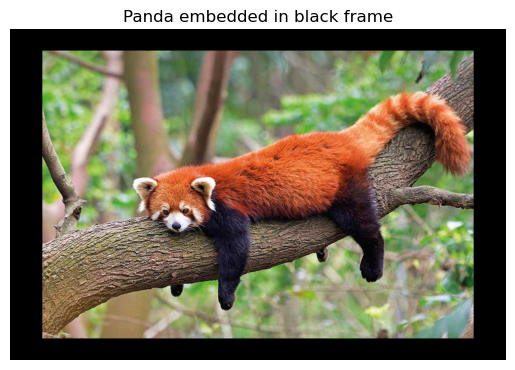

In [ ]:
#Your solution
# Create a black RGB image 15% larger than panda and embed the panda centered
from math import ceil


h, w = panda.shape[0], panda.shape[1]
new_h = int(ceil(h * 1.15))
new_w = int(ceil(w * 1.15))

# Handle channels
framed = np.zeros((new_h, new_w, panda.shape[2]), dtype=panda.dtype)

# compute top-left corner to center the panda
start_h = (new_h - h) // 2
start_w = (new_w - w) // 2

# place the panda into the framed image
framed[start_h:start_h+h, start_w:start_w+w, :] = panda



print('Original shape:', panda.shape)
print('Framed shape:', framed.shape)

plt.imshow(framed)
plt.title('Panda embedded in black frame')
plt.axis('off')
plt.show()

b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

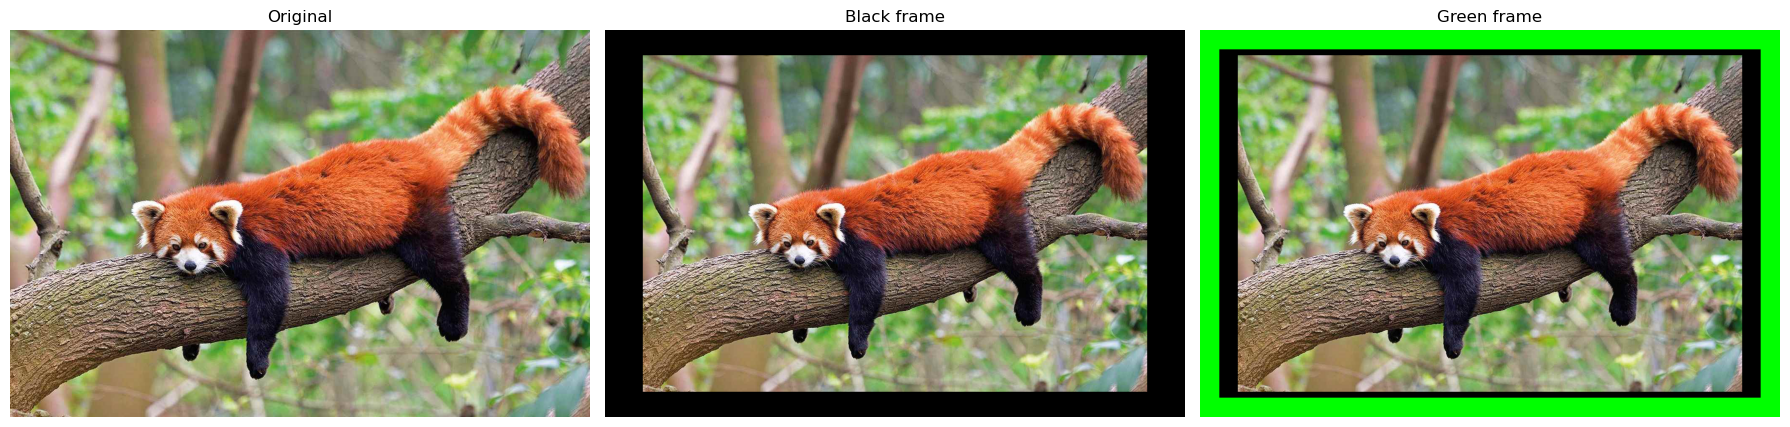

In [22]:
#Your solution
# Change the frame of the new image to green and display original, black frame and green frame
# framed was created in previous cell; if not, recreate it quickly

# Create a green framed copy (set border to green)
green_framed = framed.copy()
# Define border thickness (we'll make a frame of 10 pixels or 5% of smaller dim)
thickness = max(10, int(min(new_h, new_w) * 0.05))

# set top and bottom
green_framed[0:thickness, :, 0] = 0   # R
green_framed[0:thickness, :, 1] = 255 # G
green_framed[0:thickness, :, 2] = 0   # B

green_framed[-thickness:, :, 0] = 0
green_framed[-thickness:, :, 1] = 255
green_framed[-thickness:, :, 2] = 0

# set left and right
green_framed[:, 0:thickness, 0] = 0
green_framed[:, 0:thickness, 1] = 255
green_framed[:, 0:thickness, 2] = 0

green_framed[:, -thickness:, 0] = 0
green_framed[:, -thickness:, 1] = 255
green_framed[:, -thickness:, 2] = 0

# Display original, black framed and green framed side-by-side
fig, axs = plt.subplots(1,3, figsize=(18,8))
axs[0].imshow(panda)
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(framed)
axs[1].set_title('Black frame')
axs[1].axis('off')

axs[2].imshow(green_framed)
axs[2].set_title('Green frame')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### 1.5 Contrast enhancement

a) In some domains like medical imaging, it is common to have images with low contrast. Open the image `images_notebook/cell_lowcontrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image.

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


Shape: (898, 1181, 4)
Data type: uint8
Min value: 80
Max value: 255


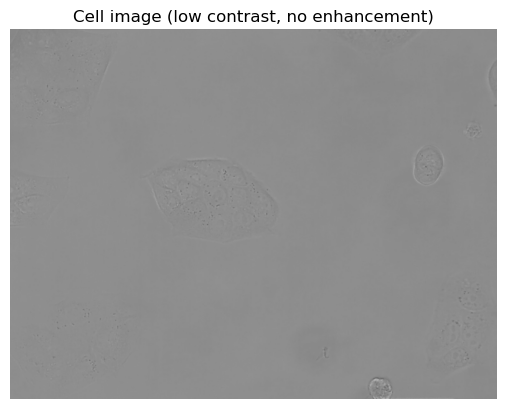

In [24]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load image
cell = io.imread("images_notebook/cell_lowcontrast.png")

# Image details
print("Shape:", cell.shape)
print("Data type:", cell.dtype)
print("Min value:", cell.min())
print("Max value:", cell.max())

# Get datatype limits
if cell.dtype == np.uint8:
    vmin, vmax = 0, 255
elif cell.dtype == np.uint16:
    vmin, vmax = 0, 65535
else:  # float images
    vmin, vmax = 0.0, 1.0

# Show without automatic enhancement
plt.imshow(cell, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Cell image (low contrast, no enhancement)")
plt.axis("off")
plt.show()


b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

Original image: min = 80  max = 255
Dark image:     min = 0  max = 175


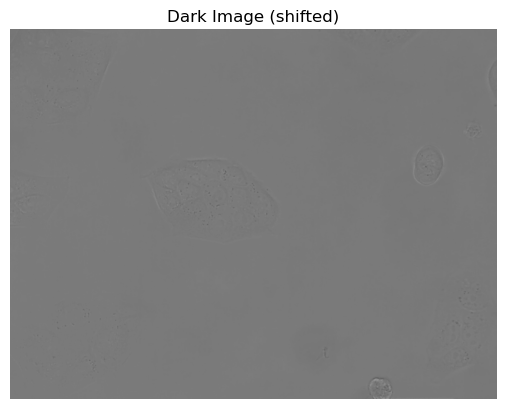

In [79]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
im = io.imread("images_notebook/cell_lowcontrast.png")

# Compute min value
min_val = im.min()

# Create dark_image by subtracting the minimum
dark_image = im - min_val

# Print new min and max values
print("Original image: min =", im.min(), " max =", im.max())
print("Dark image:     min =", dark_image.min(), " max =", dark_image.max())

# Show the new image (without graylevel enhancement)
plt.imshow(dark_image, cmap="gray")
plt.title("Dark Image (shifted)")
plt.axis("off")
plt.show()


c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


Min value of bright_im: 80
Max value of bright_im: 255


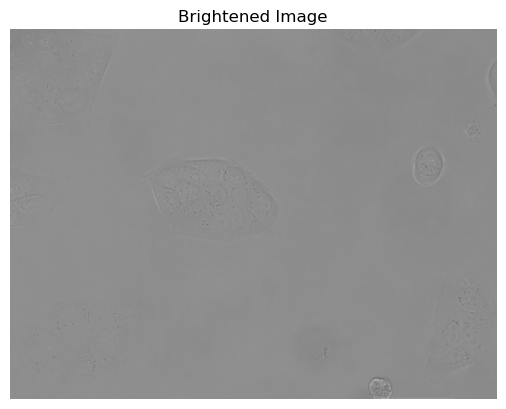

In [25]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = io.imread("images_notebook/cell_lowcontrast.png")

# Create bright_im so that its maximal value is 255
bright_im = im * (255.0 / im.max())
bright_im = bright_im.astype(np.uint8)  # convert to 8-bit

# Check min and max values
print("Min value of bright_im:", bright_im.min())
print("Max value of bright_im:", bright_im.max())

# Show the new image (without graylevel enhancement)
plt.imshow(bright_im, cmap="gray")
plt.title("Brightened Image")
plt.axis("off")
plt.show()


d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

Original image:   min = 80  max = 255
Brightened image: min > 0, max = 255 (previous step)
Direct method:    min = 0  max = 255
Skimage method:   min = 0  max = 255


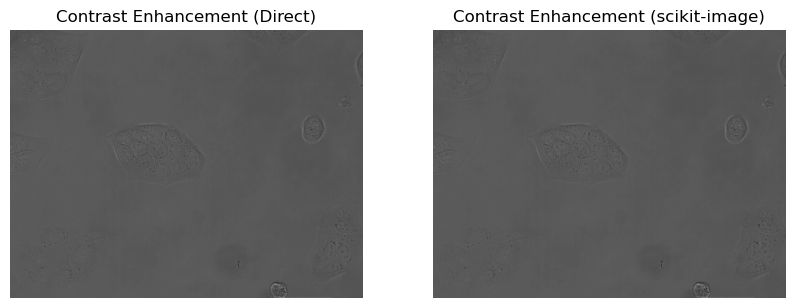

In [26]:
#Your solution
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
im = io.imread("images_notebook/cell_lowcontrast.png")

# --- Method (1): Direct manipulation ---
im_min, im_max = im.min(), im.max()
contrast_direct = (im - im_min) * (255.0 / (im_max - im_min))
contrast_direct = contrast_direct.astype(np.uint8)

# --- Method (2): Using scikit-image ---
contrast_skimage = exposure.rescale_intensity(im, in_range='image', out_range='uint8')

# --- Check values ---
print("Original image:   min =", im.min(), " max =", im.max())
print("Brightened image: min > 0, max = 255 (previous step)")
print("Direct method:    min =", contrast_direct.min(), " max =", contrast_direct.max())
print("Skimage method:   min =", contrast_skimage.min(), " max =", contrast_skimage.max())

# --- Show results (side by side) ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(contrast_direct, cmap="gray")
axes[0].set_title("Contrast Enhancement (Direct)")
axes[0].axis("off")

axes[1].imshow(contrast_skimage, cmap="gray")
axes[1].set_title("Contrast Enhancement (scikit-image)")
axes[1].axis("off")

plt.show()


e) Visualize the 5 images in the same figure, each one with its corresponding title.

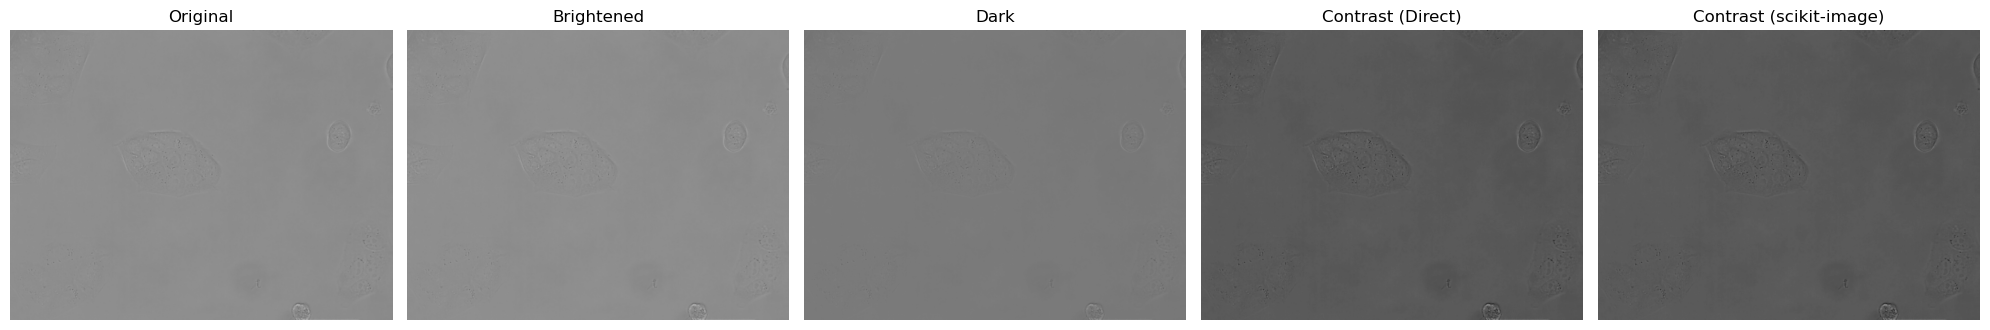

In [27]:
#Your solution
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt

# Load original image
im = io.imread("images_notebook/cell_lowcontrast.png")

# --- Brightened image ---
bright_im = im * (255.0 / im.max())
bright_im = bright_im.astype(np.uint8)

# --- Dark image ---
dark_image = im - im.min()

# --- Contrast enhancement (Direct manipulation) ---
im_min, im_max = im.min(), im.max()
contrast_direct = (im - im_min) * (255.0 / (im_max - im_min))
contrast_direct = contrast_direct.astype(np.uint8)

# --- Contrast enhancement (scikit-image) ---
contrast_skimage = exposure.rescale_intensity(im, in_range='image', out_range='uint8')

# --- Visualization ---
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

titles = ["Original", "Brightened", "Dark", 
          "Contrast (Direct)", "Contrast (scikit-image)"]
images = [im, bright_im, dark_image, contrast_direct, contrast_skimage]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()



### 1.6 Color manipulation

a) Read and visualize the image `images_notebook/barcelona.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="./images_notebook/barcelona.jpg">

<img src="images_notebook/barcelona_channels.png">

barcelona shape: (3640, 5464, 3) dtype: uint8


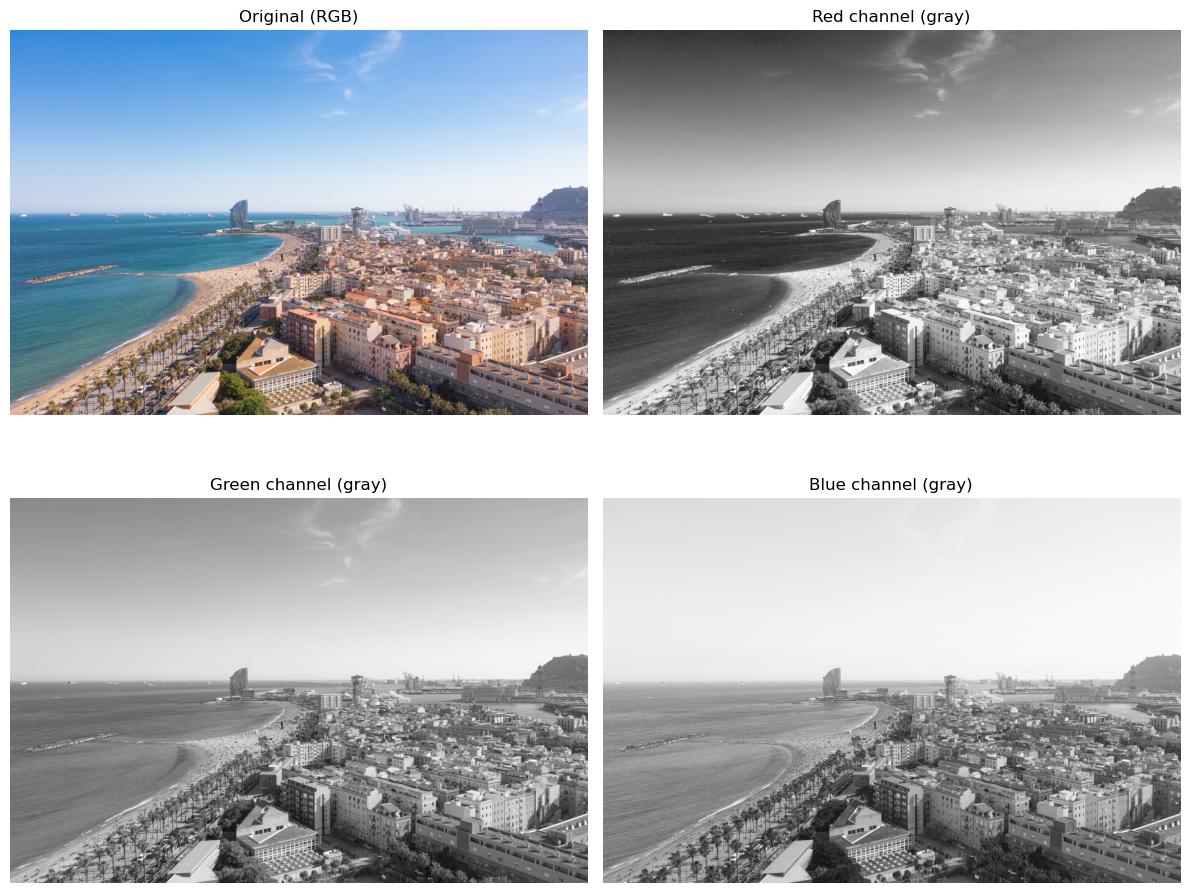

In [ ]:
#Your solution
# 1.6 a) Read barcelona.jpg, show RGB and its three channels (R,G,B)
from skimage import io
import numpy as np

img_barca = io.imread('images_notebook/barcelona.jpg')
print('barcelona shape:', img_barca.shape, 'dtype:', img_barca.dtype)

fig, axs = plt.subplots(2,2, figsize=(12,10))
axs[0,0].imshow(img_barca)
axs[0,0].set_title('Original (RGB)')
axs[0,0].axis('off')

# Extract channels
R = img_barca[:,:,0]
G = img_barca[:,:,1]
B = img_barca[:,:,2]






# Show channels as grayscale images
axs[0,1].imshow(R, cmap='gray')
axs[0,1].set_title('Red channel (gray)')
axs[0,1].axis('off')

axs[1,0].imshow(G, cmap='gray')
axs[1,0].set_title('Green channel (gray)')
axs[1,0].axis('off')

axs[1,1].imshow(B, cmap='gray')
axs[1,1].set_title('Blue channel (gray)')
axs[1,1].axis('off')

plt.tight_layout()
plt.show()

b) Read and visualize the image images_notebook/chairs.jpg.
Interchange the red and blue channels and show the original and resulting image side by side with their respective titles.

chairs shape: (1080, 1080, 3) dtype: uint8


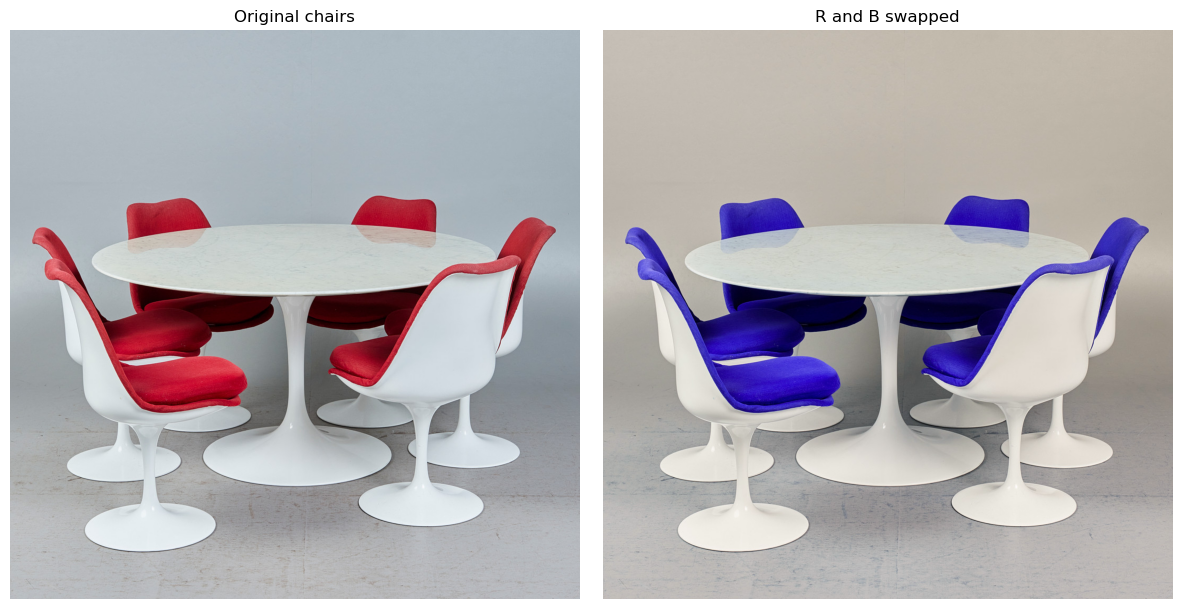

In [ ]:
#Your solution
# 1.6 b) Read chairs.jpg and swap red and blue channels
from skimage import io

chairs = io.imread('images_notebook/chairs.jpg')
print('chairs shape:', chairs.shape, 'dtype:', chairs.dtype)

# Create a copy and swap channels
chairs_swapped = chairs.copy()
chairs_swapped[:,:,0] = chairs[:,:,2]
chairs_swapped[:,:,2] = chairs[:,:,0]





# Display original and swapped side by side
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(chairs)
axs[0].set_title('Original chairs')
axs[0].axis('off')

axs[1].imshow(chairs_swapped)
axs[1].set_title('R and B swapped')
axs[1].axis('off')

plt.tight_layout()
plt.show()

### 1.7 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

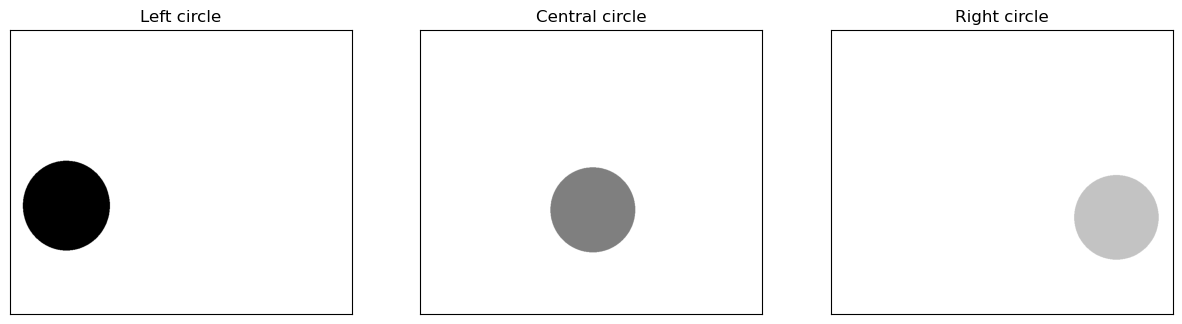

In [12]:
# Load the image.
circles = io.imread('images_notebook/circles.bmp')

# Convert the image in grayscale.
circles_gray = rgb2gray(circles)

# Get all the colors that appear in the image.
colors = np.unique(circles_gray) 

# Set the three images with which we will work.
first_circle = circles_gray.copy()
second_circle = circles_gray.copy()
third_circle = circles_gray.copy()    

circles = [first_circle, second_circle, third_circle]

# For all the circles.
for i in range(len(colors) - 1):
    
    # For all of the pixels whose color is not the specified, paint it with black.
    circles[i][circles_gray != colors[i]] = 1
# Function that shows a group of specified images.
def visualize_image_group_high_contrast(images, titles):
    
    # Create a subplot for all the images.
    f, axarr = plt.subplots(1, len(images))
    f.set_size_inches(15, 15)
    
    # For all the images.
    for i in range(len(images)):
    
        # Set the image and its title.
        axarr[i].imshow(images[i], cmap = 'gray', vmin = 0, vmax = 1)
        axarr[i].set_title(titles[i])
        
        # Delete the numeration on the axis.
        axarr[i].xaxis.set_visible(False)
        axarr[i].yaxis.set_visible(False)
        
    # Show all the images.
    plt.show()
# Declare all the images and its titles.
images = [first_circle, second_circle, third_circle]
titles = ["Left circle", "Central circle", "Right circle"]

# Visualize it all.
visualize_image_group_high_contrast(images, titles)


b) Now create a similar plot to the previous one, but this time each of the 3 images must contain two balls.
- The first image must contain the central and right balls.
- The second image must contain the left and right balls.
- The third image must contain the left and central balls.

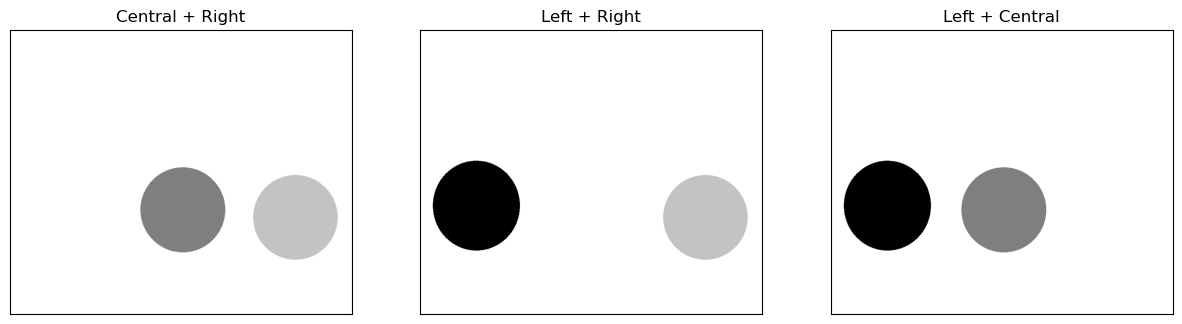

In [13]:
# Suponemos que ya existen: circles_gray, colors y visualize_image_group_high_contrast

# 1) Central + Derecha  -> mantener colors[1] y colors[2]
central_right = circles_gray.copy()
central_right[(circles_gray != colors[1]) & (circles_gray != colors[2])] = 1

# 2) Izquierda + Derecha -> mantener colors[0] y colors[2]
left_right = circles_gray.copy()
left_right[(circles_gray != colors[0]) & (circles_gray != colors[2])] = 1

# 3) Izquierda + Central -> mantener colors[0] y colors[1]
left_central = circles_gray.copy()
left_central[(circles_gray != colors[0]) & (circles_gray != colors[1])] = 1

# Mostrar
images_two = [central_right, left_right, left_central]
titles_two  = ["Central + Right", "Left + Right", "Left + Central"]
visualize_image_group_high_contrast(images_two, titles_two)


c) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


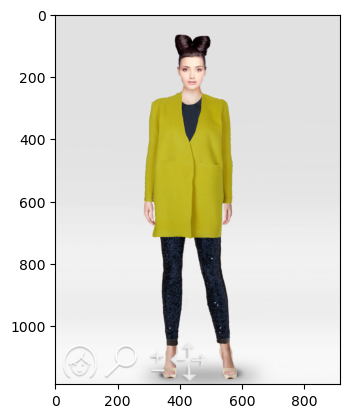

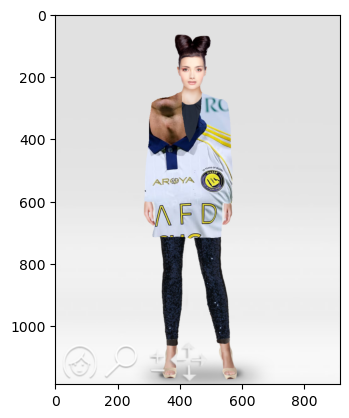

In [61]:
#Your solution

# Load the images.
coat = io.imread('images_notebook/coat.png')
model = io.imread('images_notebook/model.png')

# Get the valules of the width and the height of the image.
height = model.shape[0]
width = model.shape[1]

# Traverse the array by row and column 
for i in range(height):
    for j in range(width):
        
        # Take the coat from the first image because
        # the coat is the only that has the pixels != 0
        if (coat[i][j][0] != 0) and (coat[i][j][1] != 0) and (coat[i][j][2] != 0):
            
            # Put on the coords of the model our coat because
            # they have same position and size
            model[i][j] =  coat[i][j]

# Set the colormap as gray, that allows to see a image in grayscale.
cmap = 'gray'

# Show the image
plt.imshow(model, cmap, vmin = 0, vmax = 1)
plt.show()

# Load the images.
coat = io.imread('images_notebook/coat.png')
model = io.imread('images_notebook/model.png')
texture = io.imread('images_notebook/texture2.png')

# Get the valules of the width and the height of the image.
height = model.shape[0]
width = model.shape[1]

# Traverse the array by row and column 
for i in range(height):
    for j in range(width):
        
        # Take the coat from the first image because
        # the coat is the only that has the pixels != 0
        if (coat[i][j][0] != 0) and (coat[i][j][1] != 0) and (coat[i][j][2] != 0):
            
            # Apply the texture
            for x in range(3): 
                model[i][j][x] =  texture[i][j][x]

# Set the colormap as gray, that allows to see a image in grayscale.
cmap = 'gray'

# Show the image
plt.imshow(model, cmap, vmin = 0, vmax = 1)
plt.show()
